In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt


In [38]:
# Set batch specifications
batch_size = 64  # Adjust batch size for memory efficiency
img_height = 250
img_width = 250


In [39]:
# Load datasets
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\AP22110010529\ML_Datasets\frames\train",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\AP22110010529\ML_Datasets\frames\val",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\AP22110010529\ML_Datasets\frames\test",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)


Found 3501 files belonging to 2 classes.
Found 366 files belonging to 2 classes.
Found 905 files belonging to 2 classes.


In [40]:
# Optimize datasets
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)


In [41]:
# Use pre-trained EfficientNet model
base_cnn = EfficientNetB0(include_top=False, input_shape=(img_height, img_width, 3), pooling='avg')
base_cnn.trainable = False


In [42]:
# Feature extraction function
def extract_features(data):
    features, labels = [], []
    for images, lbls in data:
        features_batch = base_cnn.predict(images, verbose=0)
        features.extend(features_batch)
        labels.extend(lbls)
    return np.array(features), np.array(labels)

train_features, train_labels = extract_features(training_data)
val_features, val_labels = extract_features(validation_data)
test_features, test_labels = extract_features(testing_data)


In [43]:
# Encode labels
encoder = LabelEncoder()
train_labels_enc = encoder.fit_transform(train_labels)
val_labels_enc = encoder.transform(val_labels)
test_labels_enc = encoder.transform(test_labels)


In [44]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_model.fit(train_features, train_labels_enc)

# Validate Random Forest model
val_preds_rf = rf_model.predict(val_features)
print("Random Forest Validation Accuracy:", accuracy_score(val_labels_enc, val_preds_rf))
print("Classification Report for Random Forest (Validation):")
print(classification_report(val_labels_enc, val_preds_rf))

# Test Random Forest model
test_preds_rf = rf_model.predict(test_features)
print("Random Forest Test Accuracy:", accuracy_score(test_labels_enc, test_preds_rf))
print("Classification Report for Random Forest (Test):")
print(classification_report(test_labels_enc, test_preds_rf))


Random Forest Validation Accuracy: 0.8469945355191257
Classification Report for Random Forest (Validation):
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       292
           1       0.72      0.39      0.51        74

    accuracy                           0.85       366
   macro avg       0.79      0.68      0.71       366
weighted avg       0.83      0.85      0.83       366

Random Forest Test Accuracy: 0.9812154696132597
Classification Report for Random Forest (Test):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       639
           1       0.94      1.00      0.97       266

    accuracy                           0.98       905
   macro avg       0.97      0.99      0.98       905
weighted avg       0.98      0.98      0.98       905



In [45]:
# Train Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42, n_jobs=-1)
bagging_model.fit(train_features, train_labels_enc)

# Validate Bagging model
val_preds_bagging = bagging_model.predict(val_features)
print("Bagging Validation Accuracy:", accuracy_score(val_labels_enc, val_preds_bagging))
print("Classification Report for Bagging (Validation):")
print(classification_report(val_labels_enc, val_preds_bagging))

# Test Bagging model
test_preds_bagging = bagging_model.predict(test_features)
print("Bagging Test Accuracy:", accuracy_score(test_labels_enc, test_preds_bagging))
print("Classification Report for Bagging (Test):")
print(classification_report(test_labels_enc, test_preds_bagging))


C:\Users\Mohith Varun\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Validation Accuracy: 0.8306010928961749
Classification Report for Bagging (Validation):
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       292
           1       0.68      0.31      0.43        74

    accuracy                           0.83       366
   macro avg       0.76      0.64      0.66       366
weighted avg       0.81      0.83      0.80       366

Bagging Test Accuracy: 0.969060773480663
Classification Report for Bagging (Test):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       639
           1       0.97      0.92      0.95       266

    accuracy                           0.97       905
   macro avg       0.97      0.96      0.96       905
weighted avg       0.97      0.97      0.97       905



In [46]:
# Train Gradient Boosting Classifier
boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
boosting_model.fit(train_features, train_labels_enc)

# Validate Boosting model
val_preds_boosting = boosting_model.predict(val_features)
print("Boosting Validation Accuracy:", accuracy_score(val_labels_enc, val_preds_boosting))
print("Classification Report for Boosting (Validation):")
print(classification_report(val_labels_enc, val_preds_boosting))

# Test Boosting model
test_preds_boosting = boosting_model.predict(test_features)
print("Boosting Test Accuracy:", accuracy_score(test_labels_enc, test_preds_boosting))
print("Classification Report for Boosting (Test):")
print(classification_report(test_labels_enc, test_preds_boosting))


Boosting Validation Accuracy: 0.825136612021858
Classification Report for Boosting (Validation):
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       292
           1       0.64      0.31      0.42        74

    accuracy                           0.83       366
   macro avg       0.74      0.63      0.66       366
weighted avg       0.80      0.83      0.80       366

Boosting Test Accuracy: 0.938121546961326
Classification Report for Boosting (Test):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       639
           1       0.83      1.00      0.90       266

    accuracy                           0.94       905
   macro avg       0.91      0.96      0.93       905
weighted avg       0.95      0.94      0.94       905



In [47]:
# Function to compute majority voting
from scipy.stats import mode

def majority_voting(*model_preds):
    """
    Perform majority voting among predictions from multiple models.
    """
    stacked_preds = np.vstack(model_preds).T  # Combine predictions from all models
    final_preds = mode(stacked_preds, axis=1).mode  # Find the mode (most common prediction) for each sample
    return final_preds.ravel()

# Predictions from all models
test_preds_rf = rf_model.predict(test_features)
test_preds_bagging = bagging_model.predict(test_features)
test_preds_boosting = boosting_model.predict(test_features)

# Ensemble predictions using majority voting
ensemble_preds = majority_voting(test_preds_rf, test_preds_bagging, test_preds_boosting)

# Evaluate Ensemble Model
print("Ensemble Model Test Accuracy:", accuracy_score(test_labels_enc, ensemble_preds))
print("Classification Report for Ensemble Model (Test):")
print(classification_report(test_labels_enc, ensemble_preds))


Ensemble Model Test Accuracy: 0.9878453038674033
Classification Report for Ensemble Model (Test):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       639
           1       0.96      1.00      0.98       266

    accuracy                           0.99       905
   macro avg       0.98      0.99      0.99       905
weighted avg       0.99      0.99      0.99       905



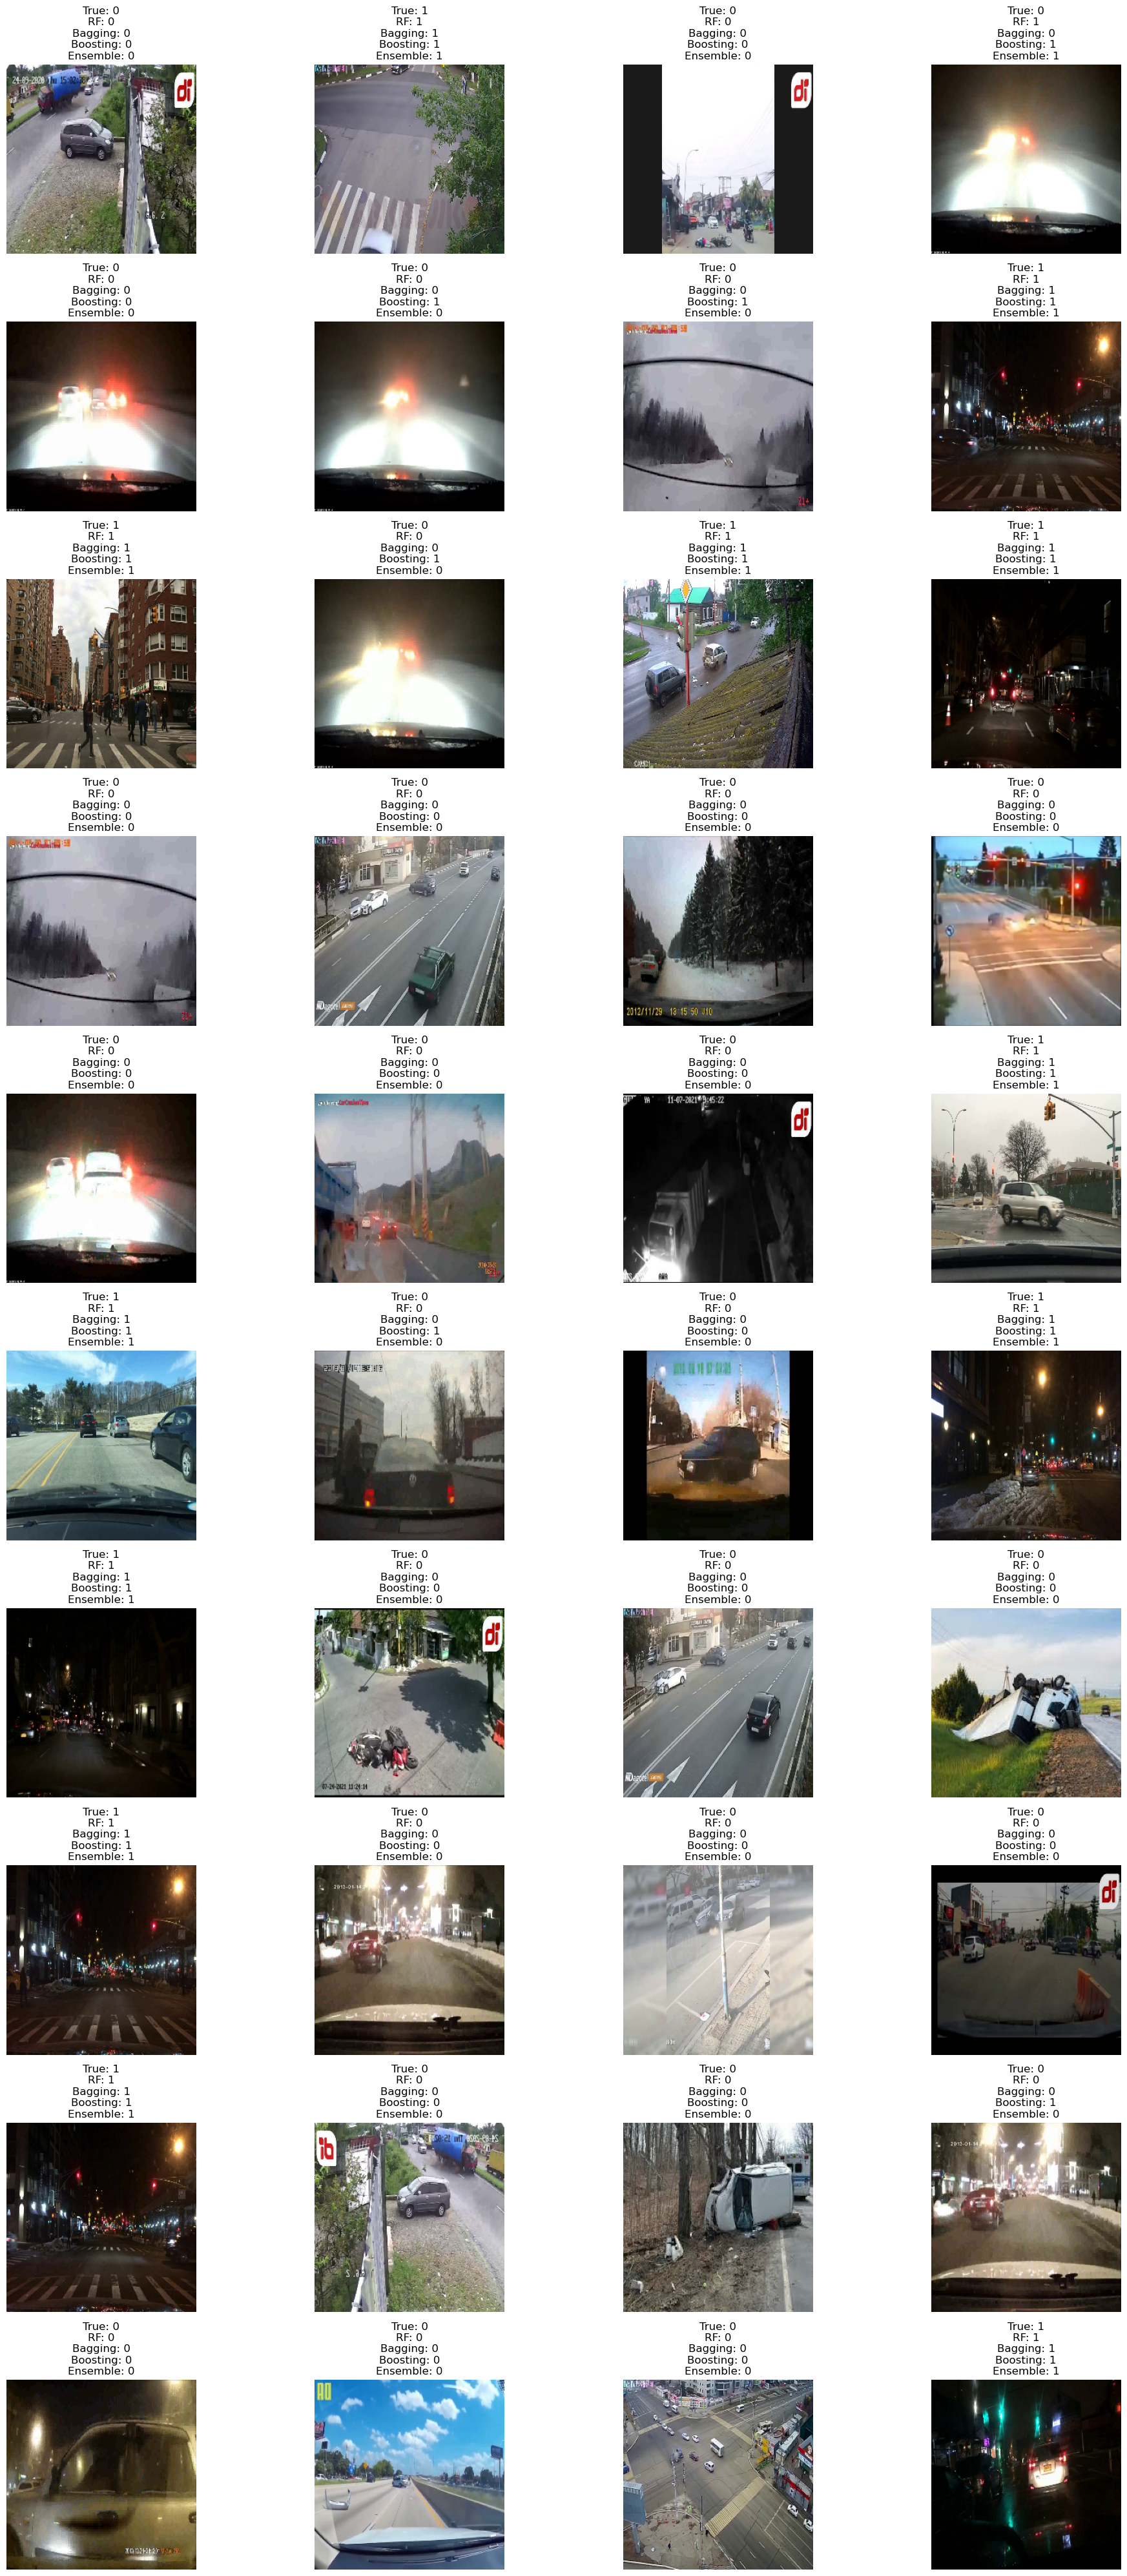

In [48]:
# Visualization of test data predictions
plt.figure(figsize=(20, 40))

# Iterate through a batch of test images and their predictions
for images, labels in testing_data.take(1):
    # Extract features using the EfficientNet model
    features_batch = base_cnn.predict(images, verbose=0)  # Efficiently extract features from the CNN model

    # Predict using all models
    predictions_rf = rf_model.predict(features_batch)  # Random Forest
    predictions_bagging = bagging_model.predict(features_batch)  # Bagging
    predictions_boosting = boosting_model.predict(features_batch)  # Boosting
    ensemble_predictions = majority_voting(predictions_rf, predictions_bagging, predictions_boosting)  # Ensemble

    # Convert the predictions to class names using LabelEncoder
    pred_rf_labels = encoder.inverse_transform(predictions_rf)  # Random Forest predictions
    pred_bagging_labels = encoder.inverse_transform(predictions_bagging)  # Bagging predictions
    pred_boosting_labels = encoder.inverse_transform(predictions_boosting)  # Boosting predictions
    pred_ensemble_labels = encoder.inverse_transform(ensemble_predictions)  # Ensemble predictions
    true_labels = encoder.inverse_transform(labels.numpy())  # True labels

    # Visualize the first 40 test images with predicted and actual labels
    for i in range(40):  # Adjust number of images to display
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(
            f"True: {true_labels[i]}\n"
            f"RF: {pred_rf_labels[i]}\n"
            f"Bagging: {pred_bagging_labels[i]}\n"
            f"Boosting: {pred_boosting_labels[i]}\n"
            f"Ensemble: {pred_ensemble_labels[i]}"
        )
        plt.axis('off')
        plt.grid(True)

# Show the plot with the images, predictions from all models, and actual labels
plt.tight_layout()
plt.show()


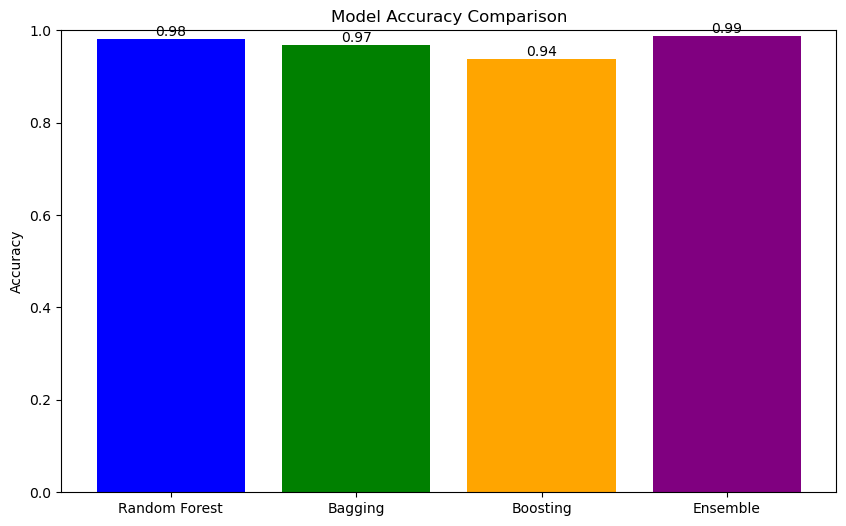

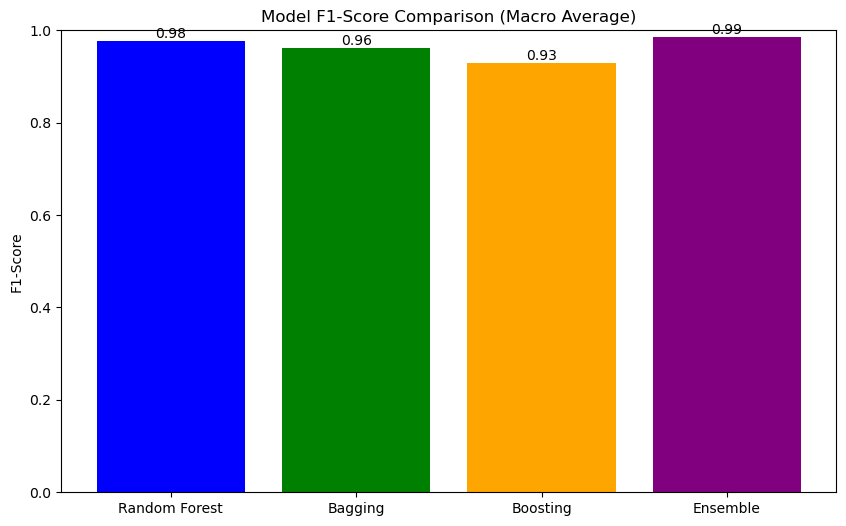

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Collect Accuracy Scores
accuracy_scores = {
    "Random Forest": accuracy_score(test_labels_enc, test_preds_rf),
    "Bagging": accuracy_score(test_labels_enc, test_preds_bagging),
    "Boosting": accuracy_score(test_labels_enc, test_preds_boosting),
    "Ensemble": accuracy_score(test_labels_enc, ensemble_preds),
}

# Collect F1 Scores (for macro-average)
from sklearn.metrics import f1_score

f1_scores = {
    "Random Forest": f1_score(test_labels_enc, test_preds_rf, average='macro'),
    "Bagging": f1_score(test_labels_enc, test_preds_bagging, average='macro'),
    "Boosting": f1_score(test_labels_enc, test_preds_boosting, average='macro'),
    "Ensemble": f1_score(test_labels_enc, ensemble_preds, average='macro'),
}

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'orange', 'purple'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
for i, acc in enumerate(accuracy_scores.values()):
    plt.text(i, acc, f"{acc:.2f}", ha='center', va='bottom', fontsize=10)
plt.show()

# Plot F1-Score Comparison
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue', 'green', 'orange', 'purple'])
plt.title('Model F1-Score Comparison (Macro Average)')
plt.ylabel('F1-Score')
plt.ylim(0, 1)  # F1-score ranges from 0 to 1
for i, f1 in enumerate(f1_scores.values()):
    plt.text(i, f1, f"{f1:.2f}", ha='center', va='bottom', fontsize=10)
plt.show()


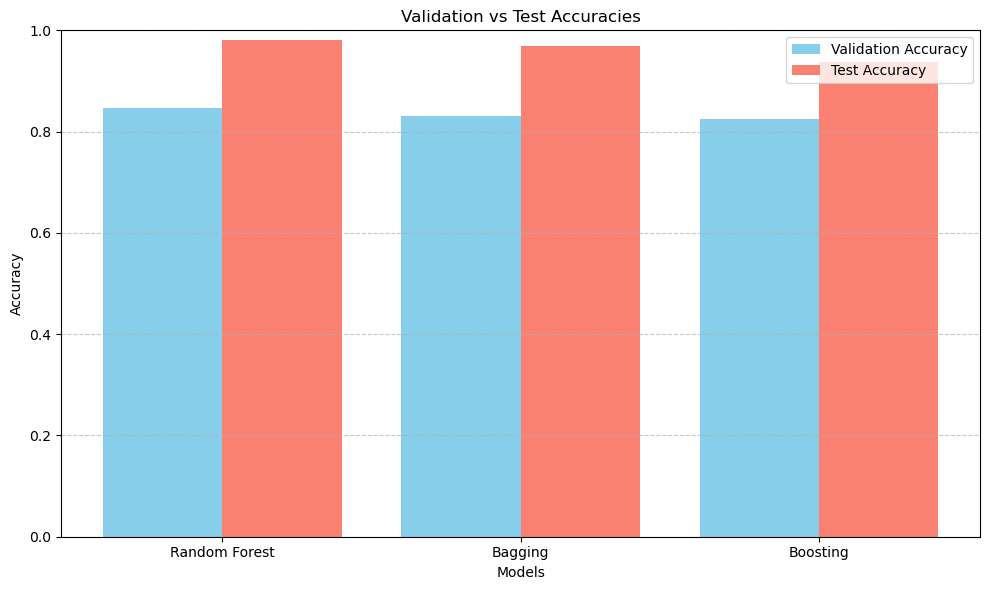

In [51]:
# Collect accuracy data
validation_accuracies = [
    accuracy_score(val_labels_enc, val_preds_rf),       # Random Forest Validation Accuracy
    accuracy_score(val_labels_enc, val_preds_bagging), # Bagging Validation Accuracy
    accuracy_score(val_labels_enc, val_preds_boosting) # Boosting Validation Accuracy
]

test_accuracies = [
    accuracy_score(test_labels_enc, test_preds_rf),       # Random Forest Test Accuracy
    accuracy_score(test_labels_enc, test_preds_bagging), # Bagging Test Accuracy
    accuracy_score(test_labels_enc, test_preds_boosting) # Boosting Test Accuracy
]

ensemble_test_accuracy = accuracy_score(test_labels_enc, ensemble_preds) # Ensemble Test Accuracy

# Add Ensemble data for comparison (without validation accuracy)
models = ["Random Forest", "Bagging", "Boosting", "Ensemble"]
validation_accuracies.append(None)  # Ensemble doesn't have validation accuracy
test_accuracies.append(ensemble_test_accuracy)

# Remove the None entry for the validation accuracies when plotting
validation_accuracies_filtered = [acc for acc in validation_accuracies if acc is not None]
test_accuracies_filtered = test_accuracies[:len(validation_accuracies_filtered)]

# Plot the graph
plt.figure(figsize=(10, 6))
x = np.arange(len(validation_accuracies_filtered))  # Positions for bar groups

# Plot bars for validation and test accuracies
bar_width = 0.4
plt.bar(x - bar_width / 2, validation_accuracies_filtered, bar_width, label="Validation Accuracy", color='skyblue')
plt.bar(x + bar_width / 2, test_accuracies_filtered, bar_width, label="Test Accuracy", color='salmon')

# Add labels and titles
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Validation vs Test Accuracies")
plt.xticks(x, models[:len(validation_accuracies_filtered)])
plt.legend()
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.tight_layout()
plt.show()
